In [1]:
import pandas as pd
import numpy as np

# Simulated solar energy dataset
data = {
    'day': np.arange(1, 31),                  # Days 1 to 30
    'sunlight_hours': np.random.uniform(4, 10, 30),  # Random sunlight hours per day between 4 to 10
    'temperature_celsius': np.random.uniform(15, 35, 30),  # Random temperature between 15°C and 35°C
}

# Solar power output depends roughly on sunlight and temperature
data['solar_power_kw'] = data['sunlight_hours'] * 5 + data['temperature_celsius'] * 0.8 + np.random.normal(0, 1, 30)

df = pd.DataFrame(data)
df.head()


,day,sunlight_hours,temperature_celsius,solar_power_kw
0,1,6.875984,26.954818,54.182136
1,2,6.959777,25.749948,54.839136
2,3,6.739549,30.456549,58.820325
3,4,7.141922,15.045492,47.613129
4,5,6.838239,17.869803,50.298426


In [3]:
print(df.describe())
print(df.corr())

             day  sunlight_hours  temperature_celsius  solar_power_kw
count  30.000000       30.000000            30.000000       30.000000
mean   15.500000        6.902137            24.717223       54.386859
std     8.803408        1.797589             6.717884       11.708792
min     1.000000        4.210476            15.045492       36.224391
25%     8.250000        5.422179            19.152699       46.853248
50%    15.500000        6.796220            25.496790       52.909941
75%    22.750000        8.176525            30.105798       59.590999
max    30.000000        9.998091            34.980560       79.235800
                          day  sunlight_hours  temperature_celsius  \
day                  1.000000       -0.213760            -0.010688   
sunlight_hours      -0.213760        1.000000             0.252497   
temperature_celsius -0.010688        0.252497             1.000000   
solar_power_kw      -0.174979        0.891217             0.652712   

                   

In [4]:
from sklearn.linear_model import LinearRegression

# Features: sunlight hours and temperature (inputs)
X = df[['sunlight_hours', 'temperature_celsius']]
# Target: solar power output (what we want to predict)
y = df['solar_power_kw']

# Create the model and train it
model = LinearRegression()
model.fit(X, y)

print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [5.05374395 0.79617946]
Model intercept: -0.17411833726685444


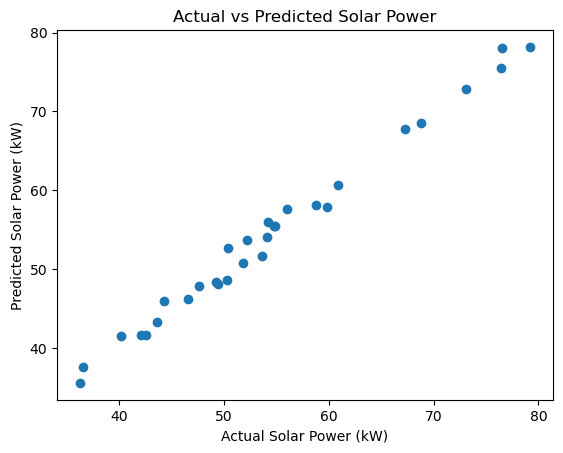

In [5]:
import matplotlib.pyplot as plt

# Use the model to predict solar power on our input data
df['predicted_power'] = model.predict(X)

# Plot actual vs predicted solar power
plt.scatter(df['solar_power_kw'], df['predicted_power'])
plt.xlabel("Actual Solar Power (kW)")
plt.ylabel("Predicted Solar Power (kW)")
plt.title("Actual vs Predicted Solar Power")
plt.show()


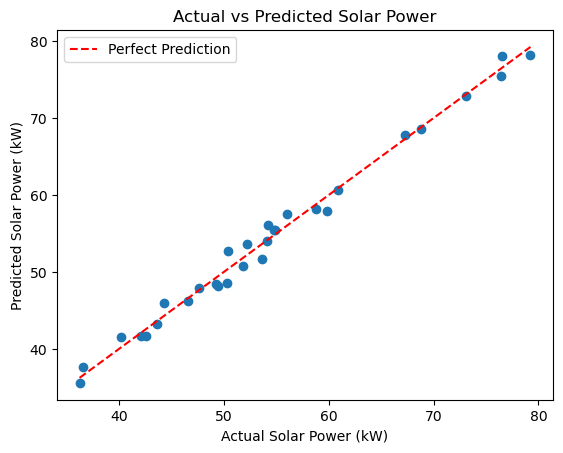

In [6]:
import numpy as np

plt.scatter(df['solar_power_kw'], df['predicted_power'])
plt.plot([df['solar_power_kw'].min(), df['solar_power_kw'].max()],  # x values for line
         [df['solar_power_kw'].min(), df['solar_power_kw'].max()],  # y values for line (same as x)
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Solar Power (kW)")
plt.ylabel("Predicted Solar Power (kW)")
plt.title("Actual vs Predicted Solar Power")
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(df['solar_power_kw'], df['predicted_power'])
r2 = r2_score(df['solar_power_kw'], df['predicted_power'])

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error (MAE): 0.995
R² Score: 0.990
